In [23]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [24]:
df=pd.read_csv('seeds.csv')
df

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [25]:
df.Type.unique()

array([1, 2, 3], dtype=int64)

In [37]:
target_ratio=pd.DataFrame({'Counts':df.Type.value_counts(),'Percentage':df.Type.value_counts()/len(data)})
target_ratio

,Counts,Percentage
2,68,0.341709
1,66,0.331658
3,65,0.326633


In [26]:
X=df.drop(['Type'],axis=1)
y=df.Type

In [27]:
X

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [28]:
y

0      1
1      1
2      1
3      1
4      1
      ..
194    3
195    3
196    3
197    3
198    3
Name: Type, Length: 199, dtype: int64

In [31]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=8,test_size=0.3)

In [42]:
dt_clf=DecisionTreeClassifier(max_depth=1)
dt_clf.fit(X_train,y_train)
dt_pred=dt_clf.predict(X_test)
acc_dt=round(accuracy_score(y_test,dt_pred),3)
print("Accuracy score of the Decision Tree Model",acc_dt)

Accuracy score of the Decision Tree Model 0.583


In [44]:
gnb_model=GaussianNB()
gnb_model.fit(X_train,y_train)
gnb_pred=gnb_model.predict(X_test)
acc_gnb=round(accuracy_score(y_test,gnb_pred),3)
print("Accuracy score of the GaussianNB Model",acc_gnb)

Accuracy score of the GaussianNB  Model 0.933


In [47]:
ada=AdaBoostClassifier(n_estimators=100,learning_rate=0.6)
ada.fit(X_train,y_train)
ada_pred=ada.predict(X_test)
acc_ada=round(accuracy_score(y_test,ada_pred),3)
print("After using AdaboostClassifier Accuracy score of the DecisionTree Model",acc_ada)

After using AdaboostClassifier Accuracy score of the DecisionTree Model 0.883


In [49]:
ada_gnb=AdaBoostClassifier(base_estimator=GaussianNB(),n_estimators=100,learning_rate=0.5)
ada_gnb.fit(X_train,y_train)
agnb_pred=ada_gnb.predict(X_test)
acc_agnb=round(accuracy_score(y_test,agnb_pred),3)
print("After using AdaboostClassifier Accuracy score of the GaussianNB Model",acc_agnb)

After using AdaboostClassifier Accuracy score of the GaussianNB Model 0.967


<BarContainer object of 4 artists>

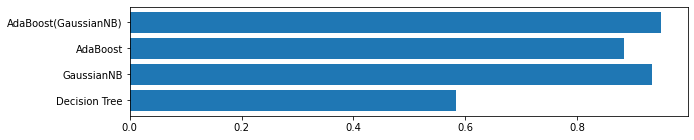

In [36]:
plt.figure(figsize=(10,2))
plt.barh(np.arange(4),[acc_dt,acc_gnb,acc_ada,acc_agnb],\
         tick_label=['Decision Tree','GaussianNB','AdaBoost','AdaBoost(GaussianNB)'])